<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mahdi Tabatabaei

**Student ID**: 400101515



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

**1. Introduction to Linear Regression:**

Linear regression is a fundamental statistical method used for modeling the relationship between a dependent variable (target) and one or more independent variables (features). It assumes a linear relationship between the predictors and the target variable. The goal of linear regression is to find the best-fitting line that minimizes the difference between the observed and predicted values.

**2. Understanding the Boston Dataset:**

The Boston dataset is a classic dataset often used for regression analysis. It contains various attributes related to housing prices in Boston suburbs. The target variable is typically the median value of owner-occupied homes, while the features include factors such as crime rate, property tax rate, pupil-teacher ratio, etc.

**3. Ridge Regression:**

Ridge regression is an extension of linear regression that addresses the issue of multicollinearity, where predictor variables are highly correlated. It adds a penalty term to the least squares method, which shrinks the coefficients towards zero. This penalty term is proportional to the square of the magnitude of the coefficients, effectively reducing their impact on the model. Ridge regression can help stabilize the model and prevent overfitting.

**4. Lasso Regression:**

Lasso regression (Least Absolute Shrinkage and Selection Operator) is another extension of linear regression that addresses multicollinearity and performs feature selection simultaneously. Similar to Ridge regression, it adds a penalty term to the least squares method. However, instead of the squared magnitude of coefficients, it penalizes the absolute magnitude. This results in some coefficients being exactly zero, effectively removing irrelevant features from the model.

**5. Application to the Boston Dataset:**

For the Boston dataset, linear regression can be used to model the relationship between various housing attributes and the median house value. Ridge and Lasso regression can then be applied to explore whether regularization techniques improve the predictive performance of the model. By tuning the regularization parameters, we can control the amount of shrinkage applied to the coefficients and evaluate the impact on model accuracy and interpretability.

**6. Conclusion:**

In summary, linear regression and its extensions, Ridge and Lasso regression, provide valuable tools for modeling relationships between variables and making predictions. These techniques can be particularly useful when dealing with datasets like the Boston dataset, where multicollinearity and feature selection are important considerations.



**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

The Boston Housing dataset contains information about different houses in Boston. It consists of 506 samples and 13 feature variables. Let's briefly discuss the features:

1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (1 if tract bounds river, 0 otherwise).
5. **NOX**: Nitric oxide concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built prior to 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Full-value property tax rate per $10,000.
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: \(1000(Bk - 0.63)^2\), where \(Bk\) is the proportion of people of African American descent by town.
13. **LSTAT**: Percentage of lower status of the population.

The target variable is the median value of owner-occupied homes (\(MEDV\)) in thousands of dollars. Exploring this dataset can provide valuable insights for housing-related analyses.

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [75]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from the CSV file
df = pd.read_csv('Q1/Boston.csv')

# Data Preprocessing
y = df['MEDV']  # Target variable
X = df.drop(columns = ['MEDV'])  # Features

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model using all features
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train R^2 score:", r2_train)
print("Test R^2 score:", r2_test)

print("\nTrain RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

# Retrieve coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)


Train R^2 score: 0.7508856358979672
Test R^2 score: 0.6687594935356316

Train RMSE: 4.6520331848801675
Test RMSE: 4.9286021826653394

Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10** np.linspace (3,-3,100) *0.5$$

In [76]:
# Define alphas parameter for Ridge regression
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Train Ridge regression models with different values of alpha
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for alpha in alphas:
    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

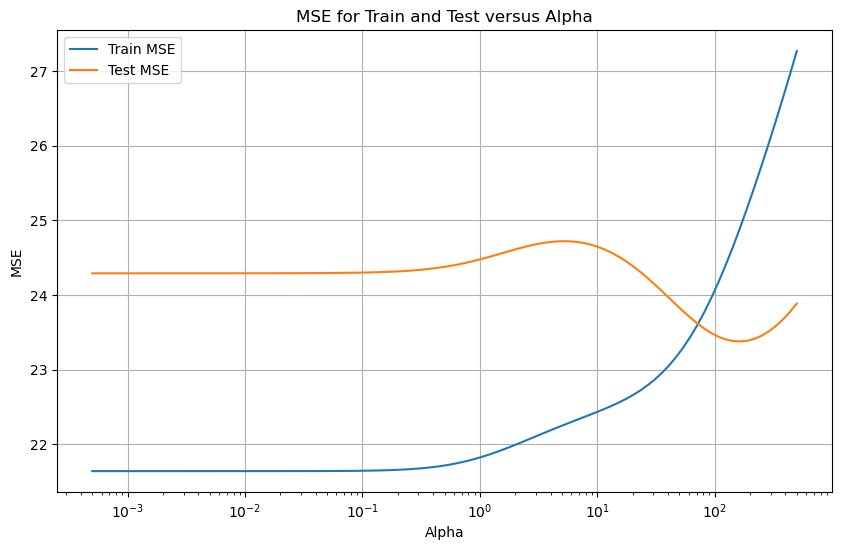

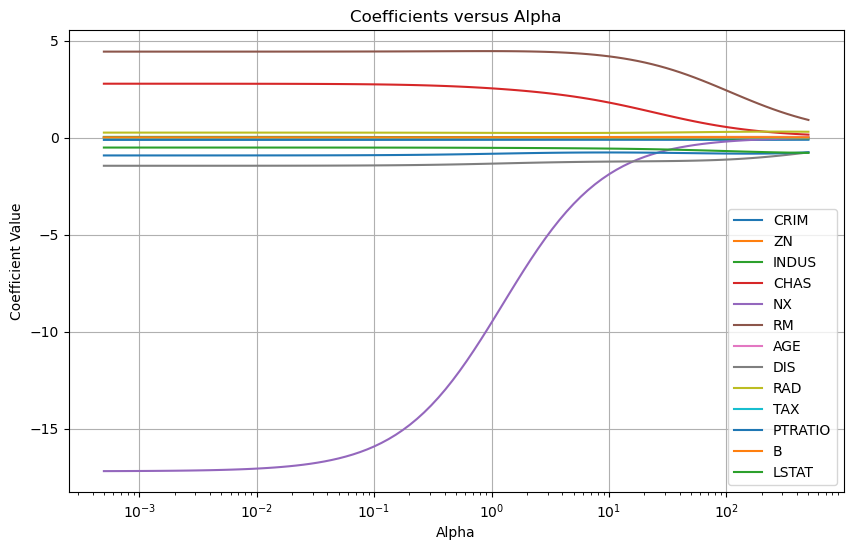

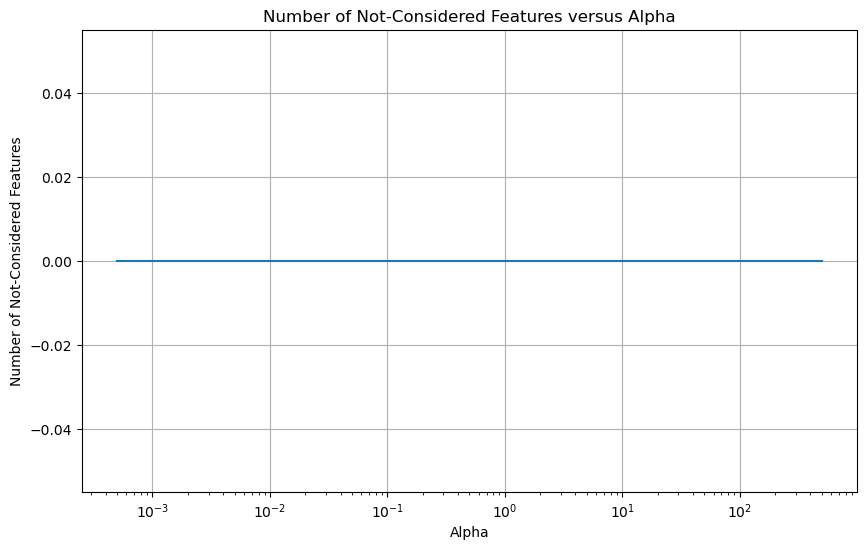

Optimal Alpha: 163.72745814388642
Test MSE with Optimal Alpha: 23.378168171507394
Test R^2 with Optimal Alpha: 0.6812087531281751
Optimal Coefficients:
CRIM: -0.1105892401747651
ZN: 0.03996101938063586
INDUS: -0.052001404240264636
CHAS: 0.3807340413242886
NX: -0.11541799895382067
RM: 1.8972033058491398
AGE: 0.00709776439063422
DIS: -1.0524156919831253
RAD: 0.30945089881321225
TAX: -0.014947408542740452
PTRATIO: -0.8227218767661514
B: 0.01159841363736587
LSTAT: -0.7258953858297853

Linear Regression Results:

Test MSE with Linear Regression: 24.291119474973545

Test R^2 with Linear Regression: 0.6687594935356316

Linear Regression Coefficients:
CRIM: -0.11305592398537943
ZN: 0.030110464145648542
INDUS: 0.04038072041333733
CHAS: 2.7844382035079613
NX: -17.202633391781568
RM: 4.438835199513041
AGE: -0.0062963622109814925
DIS: -1.4478653685307865
RAD: 0.26242973558508903
TAX: -0.010646786275308228
PTRATIO: -0.9154562404680802
B: 0.012351334729969373
LSTAT: -0.5085714244487932


In [77]:
# Initialize lists to store results
train_mse_scores = []
test_mse_scores = []
coefficients = []
not_considered_features = []

# Train Ridge regression models with different values of alpha
for alpha in alphas:
    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MSE for train and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store MSE scores
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    
    # Store coefficients
    coefficients.append(model.coef_)
    
    # Calculate number of not-considered features
    not_considered_features.append(np.sum(model.coef_ == 0))

# Plotting MSE for train and test versus alpha
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_mse_scores, label='Train MSE')
plt.plot(alphas, test_mse_scores, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

# Plotting coefficients versus alpha
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

# Plotting number of not-considered features versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha')
plt.grid(True)
plt.xscale('log')
plt.show()

# Find the optimal value of alpha
optimal_alpha_index = np.argmin(test_mse_scores)
optimal_alpha = alphas[optimal_alpha_index]
optimal_model = Ridge(alpha=optimal_alpha)
optimal_model.fit(X_train, y_train)
y_test_pred_optimal = optimal_model.predict(X_test)
optimal_r2 = r2_score(y_test, y_test_pred_optimal)
optimal_coefficients = optimal_model.coef_

# Report MSE, R^2, and coefficients for the optimal alpha
print("Optimal Alpha:", optimal_alpha)
print("Test MSE with Optimal Alpha:", test_mse_scores[optimal_alpha_index])
print("Test R^2 with Optimal Alpha:", optimal_r2)
print("Optimal Coefficients:")
for feature, coef in zip(X.columns, optimal_coefficients):
    print(feature + ":", coef)

# Compare with linear regression case
from sklearn.linear_model import LinearRegression

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_test_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_test_pred_linear)
linear_r2 = r2_score(y_test, y_test_pred_linear)
linear_coefficients = linear_model.coef_

# Report MSE, R^2, and coefficients for linear regression
print("\nLinear Regression Results:")
print("\nTest MSE with Linear Regression:", linear_mse)
print("\nTest R^2 with Linear Regression:", linear_r2)
print("\nLinear Regression Coefficients:")
for feature, coef in zip(X.columns, linear_coefficients):
    print(feature + ":", coef)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

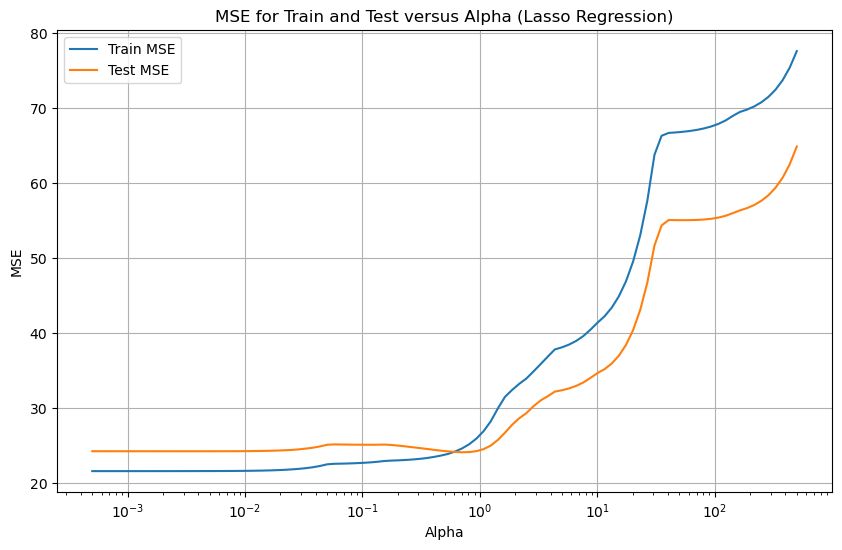

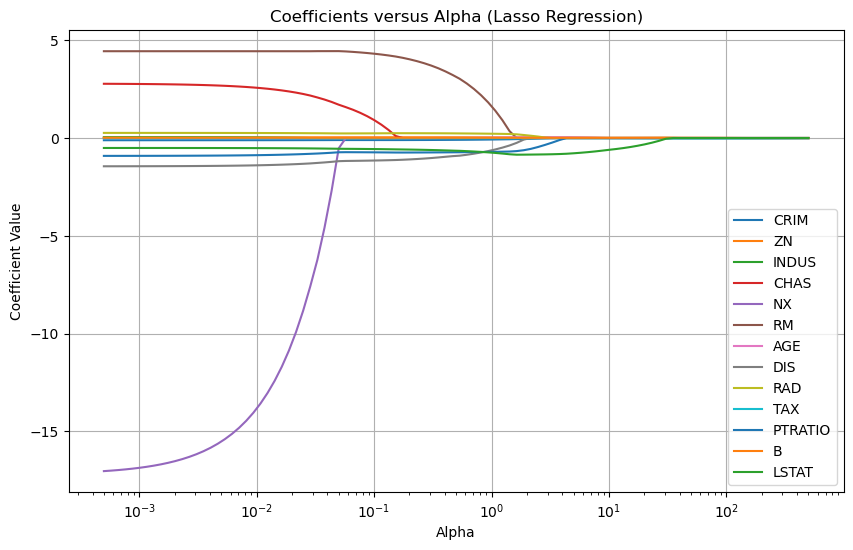

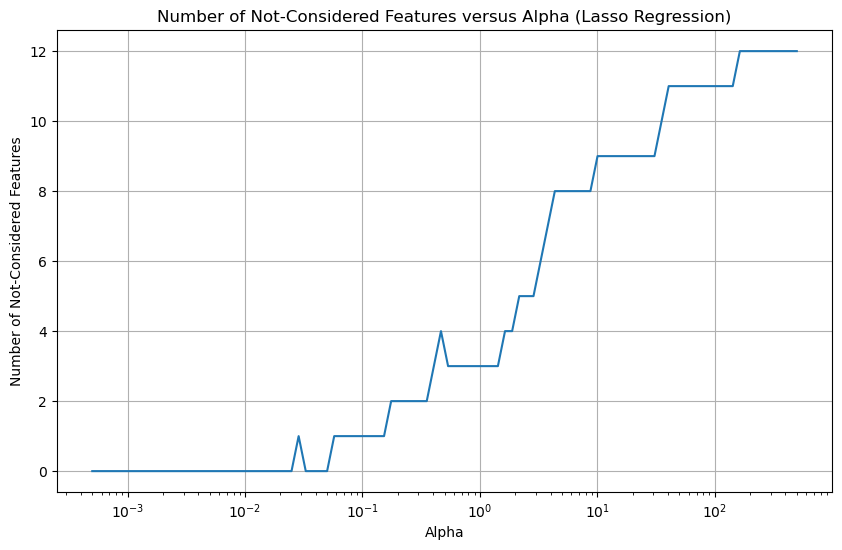

Optimal Alpha: 0.7087370814634024

Test MSE with Optimal Alpha: 24.15321924307336

Test R^2 with Optimal Alpha: 0.6706399397086964

Optimal Coefficients:
CRIM: -0.08616746198497374
ZN: 0.030806698587725043
INDUS: -0.0
CHAS: 0.0
NX: -0.0
RM: 2.50824372986858
AGE: 0.006114129499851325
DIS: -0.8015580004755933
RAD: 0.22931101994767983
TAX: -0.012707166861721164
PTRATIO: -0.7205718672396784
B: 0.011866421740392645
LSTAT: -0.6895356401458913


In [78]:
# Define alphas parameter for Lasso regression
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Initialize lists to store results
train_mse_scores = []
test_mse_scores = []
coefficients = []
not_considered_features = []

# Train Lasso regression models with different values of alpha
for alpha in alphas:
    # Train Lasso regression model
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MSE for train and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store MSE scores
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    
    # Store coefficients
    coefficients.append(model.coef_)
    
    # Calculate number of not-considered features
    not_considered_features.append(np.sum(model.coef_ == 0))

# Plotting MSE for train and test versus alpha
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_mse_scores, label='Train MSE')
plt.plot(alphas, test_mse_scores, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

# Plotting coefficients versus alpha
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

# Plotting number of not-considered features versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha (Lasso Regression)')
plt.grid(True)
plt.xscale('log')
plt.show()

# Find the optimal value of alpha
optimal_alpha_index = np.argmin(test_mse_scores)
optimal_alpha = alphas[optimal_alpha_index]
optimal_model = Lasso(alpha=optimal_alpha)
optimal_model.fit(X_train, y_train)
y_test_pred_optimal = optimal_model.predict(X_test)
optimal_r2 = r2_score(y_test, y_test_pred_optimal)
optimal_coefficients = optimal_model.coef_

# Report MSE, R^2, and coefficients for the optimal alpha
print("Optimal Alpha:", optimal_alpha)
print("\nTest MSE with Optimal Alpha:", test_mse_scores[optimal_alpha_index])
print("\nTest R^2 with Optimal Alpha:", optimal_r2)
print("\nOptimal Coefficients:")
for feature, coef in zip(X.columns, optimal_coefficients):
    print(feature + ":", coef)

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

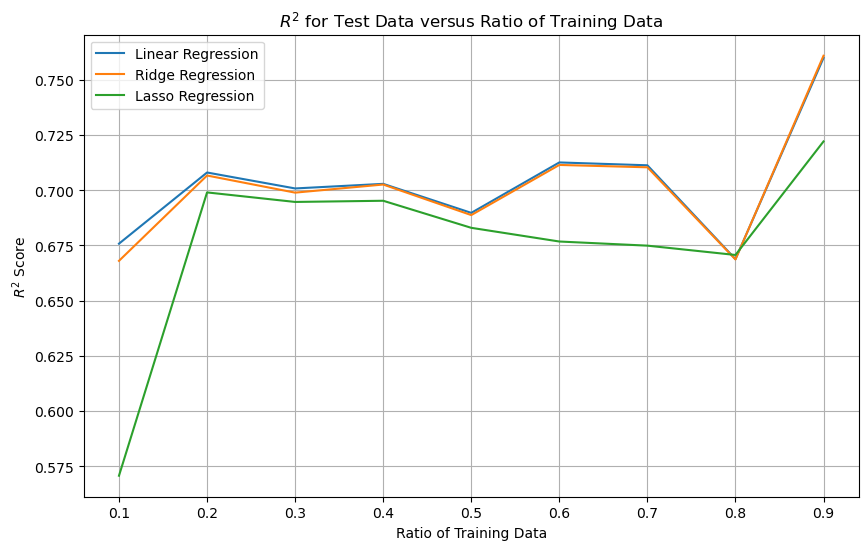

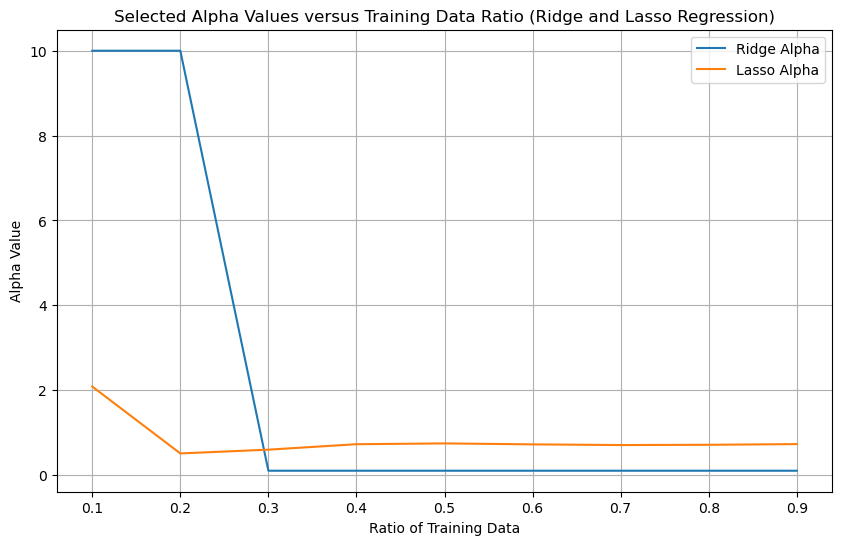

In [82]:
# Define the range of training data ratios
train_data_ratios = np.linspace(0.1, 0.9, 9)

# Initialize lists to store results
linear_r2_scores = []
ridge_r2_scores = []
lasso_r2_scores = []
ridge_alphas = []
lasso_alphas = []

# Iterate over different training data ratios
for ratio in train_data_ratios:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - ratio, random_state=42)
    
    # Train linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_r2 = r2_score(y_test, linear_model.predict(X_test))
    linear_r2_scores.append(linear_r2)
    
    # Train Ridge regression model
    ridge_model = RidgeCV()
    ridge_model.fit(X_train, y_train)
    ridge_r2 = r2_score(y_test, ridge_model.predict(X_test))
    ridge_r2_scores.append(ridge_r2)
    ridge_alphas.append(ridge_model.alpha_)
    
    # Train Lasso regression model
    lasso_model = LassoCV()
    lasso_model.fit(X_train, y_train)
    lasso_r2 = r2_score(y_test, lasso_model.predict(X_test))
    lasso_r2_scores.append(lasso_r2)
    lasso_alphas.append(lasso_model.alpha_)
    
# Plotting R^2 for test data versus ratio of training data
plt.figure(figsize=(10, 6))
plt.plot(train_data_ratios, linear_r2_scores, label='Linear Regression')
plt.plot(train_data_ratios, ridge_r2_scores, label='Ridge Regression')
plt.plot(train_data_ratios, lasso_r2_scores, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ for Test Data versus Ratio of Training Data')
plt.legend()
plt.grid(True)
plt.show()

# Plotting selected alpha values versus training data ratio for Ridge and Lasso regression methods
plt.figure(figsize=(10, 6))
plt.plot(train_data_ratios, ridge_alphas, label='Ridge Alpha')
plt.plot(train_data_ratios, lasso_alphas, label='Lasso Alpha')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Alpha Value')
plt.title('Selected Alpha Values versus Training Data Ratio (Ridge and Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()